In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

path = "/data/home/gkeren/TravelRAG/src/eval_results/UseCase2_location_identifier/results_with_human_labels.csv"
df = pd.read_csv(path)
df

,id,full_answer,answer,retrieved_answer,true_answer,correct_by_llm,correct_by_human,correct_type,correct_country,start_time,end_time,response_by,use_case
0,3.0,It looks like your picture is from Goa Jomblan...,"['Goa Jomblang Cave, Java indonesia']","['Goa Jomblang Cave, Java indonesia']",Africa Nigeria Ogbunike Cave,False,False,True,False,52:32.6,52:39.4,RAG,2
1,4.0,It looks like your picture is from Khao Yai Na...,['thailand Khao Yai National Park'],['thailand Khao Yai National Park'],Africa South Africa Blyde River Canyon,False,False,False,False,52:57.3,53:03.6,RAG,2
2,7.0,It looks like your picture is from the beautif...,"['Ulun Danu Beratan, Bali indonesia']","['Ulun Danu Beratan, Bali indonesia']",Asia China Summer Palace china,False,False,False,False,54:12.0,54:18.6,RAG,2
3,8.0,It appears your photo was taken at the magnifi...,['Temple of Heaven china'],['Temple of Heaven china'],Asia China The Forbidden City china,False,False,True,True,54:36.6,54:43.0,RAG,2
4,9.0,It looks like your picture is from the Akrotir...,"['Akrotiri Ruins, Santorini']","['Akrotiri Ruins, Santorini']",Asia China The Terracotta Army Museum china,False,False,False,False,55:02.0,55:08.5,RAG,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Hi 91! \n\nIt looks like your picture is from ...,"{'name': 'Sydney Opera House', 'location': 'Sy...",NaN,Oceania Australia Sydney Opera House,True,True,True,True,28:34.2,28:41.5,Generative Model,2
202,NaN,Hi 96! \n\nIt looks like your picture is from ...,"{'name': 'Huacachina Oasis', 'location': 'Peru'}",NaN,South America Peru Huacachina,True,True,True,True,30:35.3,30:42.3,Generative Model,2
203,NaN,Hi 97! It looks like your picture is from Mach...,"{'name': 'Machu Picchu', 'location': 'Peru'}",NaN,South America Peru Machu Picchu,True,True,True,True,30:59.6,31:06.7,Generative Model,2
204,NaN,Hi 98! \n\nIt looks like your picture is from ...,"{'name': 'Ollantaytambo', 'location': 'Peru'}",NaN,South America Peru Ollantaytambo Village,True,True,True,True,31:23.7,31:31.1,Generative Model,2


# calc aggreement

In [2]:
# Sample 20% of the rows
sampled_df = df.sample(frac=0.2, random_state=42)

# Calculate the agreement rate between 'correct_by_llm' and 'correct_by_human'
agreement = np.mean(sampled_df['correct_by_llm'] == sampled_df['correct_by_human'])

agreement

0.6097560975609756

In [3]:
agreement = np.mean(df['correct_by_llm'] == df['correct_by_human'])
agreement

0.6601941747572816

# calc accuracy

<Figure size 1600x600 with 0 Axes>

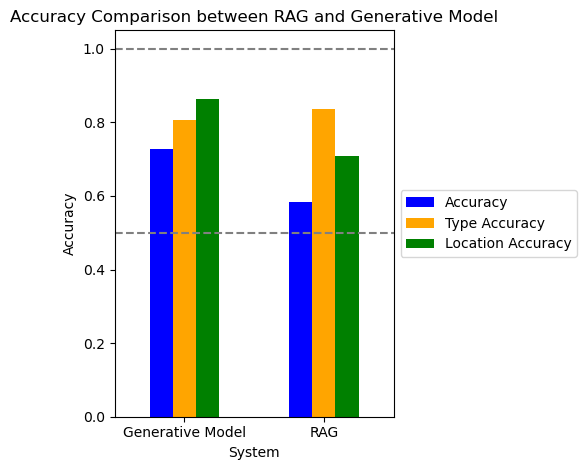

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 Accuracy calculation
accuracy = df.groupby('response_by')['correct_by_human'].mean()

# 1.2 Type accuracy calculation
type_accuracy = df.groupby('response_by')['correct_type'].mean()

# 1.3 Location accuracy calculation
location_accuracy = df.groupby('response_by')['correct_country'].mean()

# Combine the results into a single DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Accuracy': accuracy,
    'Type Accuracy': type_accuracy,
    'Location Accuracy': location_accuracy
}).reset_index()

# 2. Plotting the accuracy values
# Set the size of the figure, further increasing the width to make it less narrow and ensure nothing is cut off
plt.figure(figsize=(16, 6))

# Plotting the accuracy values
ax = accuracy_df.plot(x='response_by', kind='bar', stacked=False, color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison between RAG and Generative Model')
plt.ylabel('Accuracy')
plt.xlabel('System')
plt.xticks(rotation=0)

# Adjusting legend position to be outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add horizontal lines at 1 and 0.5
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=0.5, color='gray', linestyle='--')

# Adjust layout to avoid cutting off the legend and make the plot less narrow
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the plot as a PDF file
plt.savefig('/data/home/gkeren/TravelRAG/src/eval_results/UseCase2_location_identifier/accuracy_comparison.pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [47]:
accuracy

response_by
Generative Model    0.728155
RAG                 0.582524
Name: correct_by_human, dtype: float64

In [48]:
type_accuracy

response_by
Generative Model    0.805825
RAG                 0.834951
Name: correct_type, dtype: float64

In [49]:
location_accuracy

response_by
Generative Model    0.864078
RAG                 0.708738
Name: correct_country, dtype: float64

In [40]:
rag_wrong = df[(df['response_by'] == 'RAG') & (df['correct_by_human'] == 0)][['correct_type', 'correct_country', 'answer', 'true_answer']]
rag_wrong

,correct_type,correct_country,answer,true_answer
0,True,False,"['Goa Jomblang Cave, Java indonesia']",Africa Nigeria Ogbunike Cave
1,False,False,['thailand Khao Yai National Park'],Africa South Africa Blyde River Canyon
2,False,False,"['Ulun Danu Beratan, Bali indonesia']",Asia China Summer Palace china
3,True,True,['Temple of Heaven china'],Asia China The Forbidden City china
4,False,False,"['Akrotiri Ruins, Santorini']",Asia China The Terracotta Army Museum china
5,True,False,['Times Square new york'],Asia Japan Takeshita Dori tokyo japan
6,False,True,['thailand Doi Inthanon National Park'],Asia Thailand Big Buddha Phuket
7,True,False,"['Tumpak Sewu Waterfall, East Java indonesia']",Asia Thailand Khao Yai National Park
8,False,False,['sri lanka Dambulla Cave Temple'],Europe Belgium Choco-Story Museum Bruges
9,False,False,['The Bund china'],Europe Denmark Tivoli Gardens Copenhagen


In [41]:
rag_wrong['correct_country'].mean(), rag_wrong['correct_type'].mean()

(0.3023255813953488, 0.6046511627906976)

In [42]:
gen_wrong = df[(df['response_by'] == 'Generative Model') & (df['correct_by_human'] == 0)][['correct_type', 'correct_country', 'true_answer']]
gen_wrong

,correct_type,correct_country,true_answer
103,False,False,Africa Nigeria Lekki Conservation Centre
104,False,False,Africa Nigeria Lekki Conservation Centre
105,False,False,Africa Nigeria Ogbunike Cave
106,False,True,Europe Iceland Laugavegur Reykjavik
107,False,True,"Europe Italy Alberobello, Puglia"
108,False,True,Europe Italy Bardini Gardens Florence
109,False,True,Europe Italy Cinque Terre
110,False,False,Europe Slovenia Metelkova Ulica Ljubljana
111,False,True,Europe Spain El Rastro Market Madrid
112,False,True,Europe Spain Plaza de la Reina Valencia


In [43]:
gen_wrong['correct_country'].mean(), gen_wrong['correct_type'].mean()

(0.5, 0.35714285714285715)

# duration comparison

In [6]:
df[['start_time', 'end_time']].head()

,start_time,end_time
0,52:32.6,52:39.4
1,52:57.3,53:03.6
2,54:12.0,54:18.6
3,54:36.6,54:43.0
4,55:02.0,55:08.5


In [7]:
df[df['end_time'] < df['start_time']][['start_time', 'end_time']]

,start_time,end_time
58,59:58.6,00:04.8


In [8]:
# Converting 'start_time' and 'end_time' to datetime format
df['start_time'] = pd.to_datetime(df['start_time'], format='%M:%S.%f')
df['end_time'] = pd.to_datetime(df['end_time'], format='%M:%S.%f')

# Calculating the duration in seconds
df['duration_seconds'] = (df['end_time'] - df['start_time']).dt.total_seconds()

df[['start_time', 'end_time', 'duration_seconds']].head()

,start_time,end_time,duration_seconds
0,1900-01-01 00:52:32.600,1900-01-01 00:52:39.400,6.8
1,1900-01-01 00:52:57.300,1900-01-01 00:53:03.600,6.3
2,1900-01-01 00:54:12.000,1900-01-01 00:54:18.600,6.6
3,1900-01-01 00:54:36.600,1900-01-01 00:54:43.000,6.4
4,1900-01-01 00:55:02.000,1900-01-01 00:55:08.500,6.5


In [9]:
import pandas as pd

# Convert 'start_time' and 'end_time' to datetime format
df['start_time'] = pd.to_datetime(df['start_time'], format='%M:%S.%f')
df['end_time'] = pd.to_datetime(df['end_time'], format='%M:%S.%f')

# Adjust end_time if it is earlier than start_time
df['end_time'] = df.apply(lambda row: row['end_time'] + pd.Timedelta(hours=1) if row['end_time'] < row['start_time'] else row['end_time'], axis=1)

# Calculate the duration in seconds
df['duration_seconds'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Display the results
df[['start_time', 'end_time', 'duration_seconds']].head()


,start_time,end_time,duration_seconds
0,1900-01-01 00:52:32.600,1900-01-01 00:52:39.400,6.8
1,1900-01-01 00:52:57.300,1900-01-01 00:53:03.600,6.3
2,1900-01-01 00:54:12.000,1900-01-01 00:54:18.600,6.6
3,1900-01-01 00:54:36.600,1900-01-01 00:54:43.000,6.4
4,1900-01-01 00:55:02.000,1900-01-01 00:55:08.500,6.5


In [10]:
df.groupby('response_by')['duration_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
response_by,,,,,,,,
Generative Model,103.0,7.259223,0.422977,6.7,7.0,7.1,7.35,9.0
RAG,103.0,6.287379,0.229526,6.0,6.2,6.2,6.30,7.5


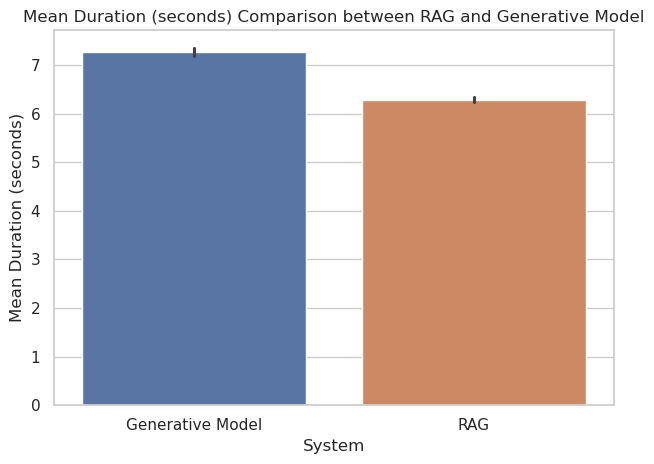

In [12]:
# Reordering the categories in 'response_by' to ensure 'RAG' is on the right
df['response_by'] = pd.Categorical(df['response_by'], categories=['Generative Model', 'RAG'], ordered=True)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="response_by", y="duration_seconds", data=df, hue="response_by")

# Adding the title and labels
plt.title('Mean Duration (seconds) Comparison between RAG and Generative Model')
plt.ylabel('Mean Duration (seconds)')
plt.xlabel('System')
plt.xticks(rotation=0)

# Adjust layout to avoid cutting off any part of the plot
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('/data/home/gkeren/TravelRAG/src/eval_results/UseCase2_location_identifier/mean_duration_comparison.pdf', bbox_inches='tight')

# Show the plot
plt.show()